# Superparamagnetic Network - Machine Learning Testing

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import random as rnd

import SP_anisotropy_class as SPN

#3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## The SP Network

$e = \frac{E}{KV}$, $H_K = \frac{2K}{\mu_0M_S}$, $h=\frac{H}{H_K}$, $k_\sigma=\frac{K_\sigma}{K}$, $\omega'=\frac{\omega}{f_0}$ and $\beta'=\frac{KV}{k_BT}$

$h=0.4$

$\theta_H=90°$

$\phi=45°$

$\beta'=10$

The system is at equilibrium with $k_\sigma=0$ and we instantly set $k_\sigma=1$.

$f_0=10^{10}Hz$

We call the characteristic memory time scale $\tau$.

In [35]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)

f0 = 1e10

In [57]:
spn.k_s = 1
SPN.calculate_energy_barriers(spn)
tau = 1./(spn.get_omega_prime()*f0) #Characteristic memory time
t_step = tau/100 #We take a t_step 100 times smaller than tau
time = np.arange(0,5*tau,t_step) #We want to see 5 tau
m_t = [spn.get_m()]

for i in range(len(time)-1):
    spn.evolve(f0,t_step)
    m_t.append(spn.get_m())

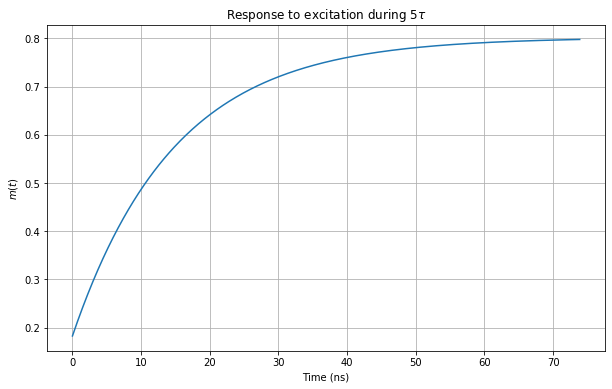

In [58]:
plt.figure(figsize=(10,6))
plt.plot(time*1e9,m_t)
plt.grid(True)
plt.title("Response to excitation during 5"+r'$\tau$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()

Now let's use a random signal as input.

In [69]:
def rnd_signal(n):
    signal = []
    for i in range(n):
        signal.append(2*rnd.random()-1)
    return(signal)

In [70]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
tau = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
tau_signal = tau #Duration of each input
t_step = tau_signal/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*tau_signal
time = np.linspace(0,n*tau_signal,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

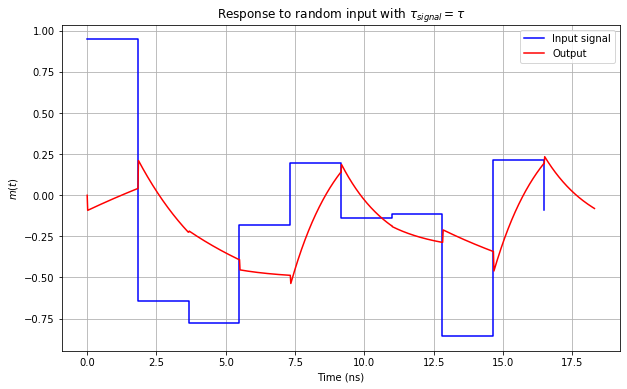

In [71]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\tau_{signal}=\tau$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [81]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
tau = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
tau_signal = tau/10 #Duration of each input
t_step = tau_signal/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*tau_signal
time = np.linspace(0,n*tau_signal,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

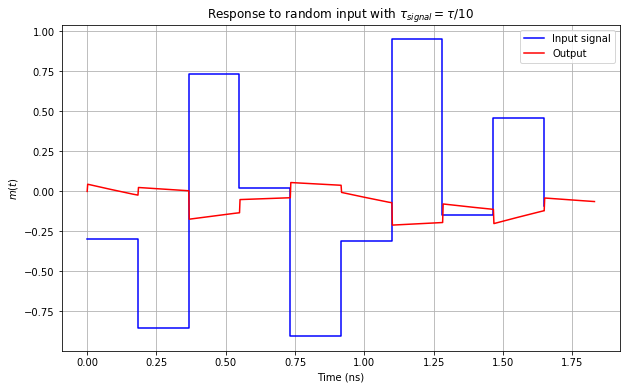

In [82]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\tau_{signal}=\tau/10$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [75]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
tau = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
tau_signal = tau*10 #Duration of each input
t_step = tau_signal/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*tau_signal
time = np.linspace(0,n*tau_signal,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

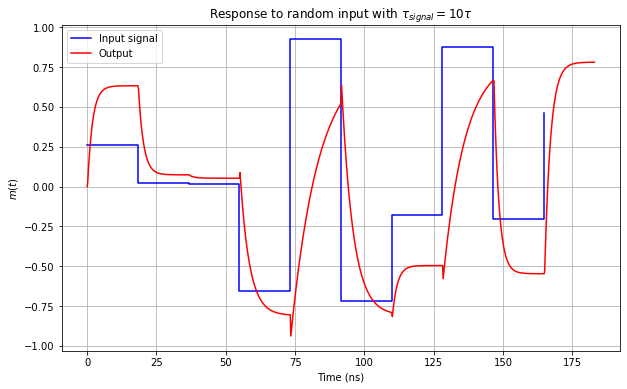

In [76]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\tau_{signal}=10\tau$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

## Towards Machine Learning

In [83]:
def Ridge_regression(S, Y, alpha):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \alpha |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * Y = (S^T * S  + \alpha I) * W
        W = (S^T*S + \alpha I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + alpha*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

In [84]:
def NARMA10(n):
    u = np.random.random(n)*0.5
    y = np.zeros(n)
    for k in range(10,n):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return (u, y[10:])

In [86]:
def mask_NARMA10(N,M):
    # N is the number of virtual nodes
    # M is the number of output nodes
    mask = []
    for i in range(N):
        mask.append(rnd.choice([-1,1]))
    mask = mask*M
    return(mask)

In [87]:
Ntrain = 5000
Nvalid = 2000

(u, x) = NARMA10(Ntrain + Nvalid)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:]
dvalid = d[Ntrain:]

[1, -1, 1, -1, 1, -1, 1, -1, 1, -1]


## Define our magnetic system

In [2]:
# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

In [3]:
# General rate equation
def SPNC_rate(f0,ebarrier,temp):

    w = f0*np.exp(-ebarrier/(constants.k*temp))

    return w

In [8]:
# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

In [5]:
def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

In [6]:
def SPNC_mag_evolver_sw(beta_prime,h_primes,t_prime):
    
    time = np.zeros(h_primes.shape[0]+1)
    mag = np.zeros(h_primes.shape[0]+1)
    time[0] = 0
    mag[0] = 0
    
    for i in range(len(time)-1):
        
        time[i+1] =  time[i] + t_prime
        mag[i+1] = SPNC_magnetisation_sw(beta_prime,h_primes[i],mag[i],t_prime)
        
    return time, mag    

## Some testing

### Excitation from zero m

We see that the behaviour looks kind of like it is intergrating the average, with noise from the deviation. The time scale sets how much the noise effects it and how long the averaging takes. Let's take a look at this by finding the expected result from the average input:

Based on this, it looks a little more complicated that straight up averaging. Perhaps it is averaging over a window? 

## Looking towards machine learning

*This is based on on Matt's code for a single node dynamical resivour (originly for the Mackey-Glass equations)*

### First Matt's code:

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def Ridge_regression(S, Y, l):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \lambda |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * S = (S^T * Y  + \lambda I) * W
        W = (S^T*S + \lambda I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + l*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

In [11]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))

In [12]:
def MSE (pred, desired):
    return np.mean(np.square(np.subtract(pred,desired)))

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [14]:
def inv_sigmoid(y):
    return - np.log((1.0/y) - 1.0)

In [205]:
class Mackey_Glass_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        # theta = temporal node spacing
        theta = params['theta']
        
        # parameters for the MG function
        Sigma = np.exp(-theta)
        gamma = 0.005
        eta = 0.5
        P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            for i in range(1,self.Nvirt):
                S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

In [22]:
def NARMA10(N):
    u = np.random.random(N+50)*0.5
    y = np.zeros(N+50)
    for k in range(10,N+50):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return u[50:], y[50:]

In [23]:
Ntrain = 5000
Nvalid = 2000
Ntest = 2000

u, d = NARMA10(Ntrain + Nvalid + Ntest)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:Ntrain+Nvalid]
dvalid = d[Ntrain:Ntrain+Nvalid]
utest = u[Ntrain+Nvalid:]
dtest = d[Ntrain+Nvalid:]

In [24]:
net = Mackey_Glass_SNR(1, 40, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'theta':0.2}
net.train(utrain, dtrain, uvalid, dvalid, params)

0.0 0.003434499025917857
0.0033992157820051604 0.1446075685762644
0.004661485743271308 0.14768592334056904
0.0063924889528206704 0.15000807246422074
0.008766285528368277 0.15174421991897968
0.012021571336618452 0.15303367702770043
0.01648567993065431 0.15398669764485487
0.02260749740328263 0.154688529850016
0.031002599892108035 0.15520401420329089
0.04251515251442982 0.15558189572385947
0.058302793946818365 0.15585851312569787
0.07995304217364506 0.15606079300154593
0.10964292652341254 0.15620860053578287
0.15035789770837651 0.15631654490548041
0.20619202825140884 0.15639534520643902
0.28275968979620314 0.15645285312527285
0.3877601032963248 0.15649481297809378
0.5317515301305706 0.15652542359439997
0.729212952525235 0.1565477521408851
1.0 0.15656403807052846
Optimal lambda =  0.0 with MSE =  0.003434499025917857


In [25]:
Stest = net.transform(utest, params)
pred = net.forward(Stest)

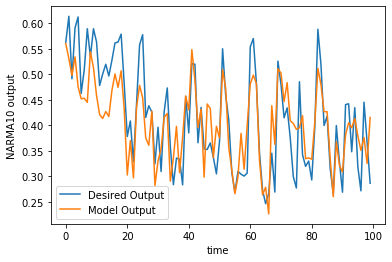

In [26]:
plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

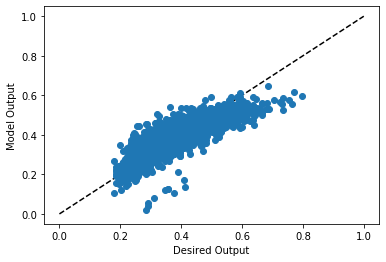

In [27]:
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

We can see it does a reasonable job of the NARMA10 task.

### An aside on errors

The subject of how to define the error is somewhat muddled in the literature. From here on, these definitions will be used: <br>
**NRMSE** is $ \sqrt{\mbox{MSE}}/\sigma $ <br>
**NMSE** is $ \mbox{MSE}/\sigma^2 $ <br>
**Mean-NRMSE or MNRMSE** is $ \sqrt{\mbox{MSE}}/\mbox{mean} $ <br>
$\sigma = $ standard deviation (although should it be n or n-1?) <br>
MSE $= \frac{\sum{(\mbox{predicted}-\mbox{desired})^2}}{\mbox{total}} $ <br>
*In my opinion, either of the measures based on standard deviation provide something which is meaningful - error from the data normalised to variance in the data. These seem to be good metrics to stick with.*

***Looking into it, it's not clear how exactly to calculate the Appelton calculated NRMSE. Instead, here I recompute using their optimum values for the net using my definitions:***

In [259]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))

In [260]:
class Mackey_Glass_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        # theta = temporal node spacing
        theta = params['theta']
        
        # parameters for the MG function
        Sigma = np.exp(-theta)
        gamma = 0.01
        eta = 0.5
        P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            for i in range(1,self.Nvirt):
                S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

0.0 0.0027774398456156847
0.0033992157820051604 0.03936327992988757
0.004661485743271308 0.04697943828657496
0.0063924889528206704 0.05647661327884188
0.008766285528368277 0.0675348868578472
0.012021571336618452 0.07952498557725006
0.01648567993065431 0.09165838342611622
0.02260749740328263 0.10318428388919502
0.031002599892108035 0.11354344758622151
0.04251515251442982 0.12242981346929283
0.058302793946818365 0.12976826097426136
0.07995304217364506 0.13564795043261724
0.10964292652341254 0.14024927757904884
0.15035789770837651 0.14378584895045338
0.20619202825140884 0.14646723233209089
0.28275968979620314 0.14847955255232276
0.3877601032963248 0.1499783156127831
0.5317515301305706 0.15108832036435801
0.729212952525235 0.1519070018455079
1.0 0.15250897999073795
Optimal lambda =  0.0 with MSE =  0.0027774398456156847


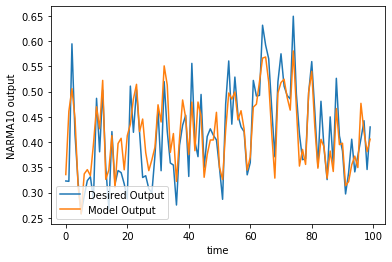

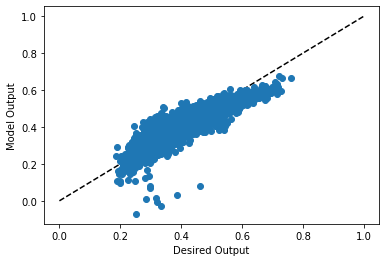

NRMSE is 0.4987017274625757
NMSE is 0.2487034129741571
MNRMSE is  0.13450930430817493
MNMSE (to check if Appelton was using this!) is  0.007027822904339361
Variance-NRMSE (to check if Appelton was using this!) is 4.7600691584824855


In [262]:
net = Mackey_Glass_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'theta':0.2}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))
print('MNMSE (to check if Appelton was using this!) is ', (MSE(pred,dtest))/np.mean(dtest) )
print('Variance-NRMSE (to check if Appelton was using this!) is' , np.sqrt(MSE(pred,dtest))/np.power(np.std(dtest),2))

This implies that they aren't using NRMSE (as I thought was implied in the text) as the value is larger than they say you should get for a shift register (0.4). Not clear they are using mean normalised either though (they claim only 0.15, not 0.13)...In fact none of these numbers are the same as theirs. They do, at least offer a comparison though!

### Now for our case

***Need to tidy this up!***

#### Defining the net

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def Ridge_regression(S, Y, l):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \lambda |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * S = (S^T * Y  + \lambda I) * W
        W = (S^T*S + \lambda I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + l*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

In [30]:
def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))



In [31]:
# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

In [32]:
# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

In [33]:
def MSE (pred, desired):
    return np.mean(np.square(np.subtract(pred,desired)))

In [34]:
class SPNC_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        #Getting parameters
        # theta = temporal node spacing
        theta = params['theta']
        
        # gamma = feedback term
        gamma = params['gamma']
        
        #beta_prime = KV/KbT (effective temperature)
        beta_prime = params['beta_prime']
        
        # parameters for the MG function
        #Sigma = np.exp(-theta)
        #gamma = 0.005
        #eta = 0.5
        #P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            # S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            
            #First column is fed into from last column of previous row
            S[k,0] = SPNC_magnetisation_sw(beta_prime, (J[k,0] + gamma*S[k-1,0]) ,S[k-1,self.Nvirt-1],theta)
            
            for i in range(1,self.Nvirt):
                # S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
                
                #Moving along one row feeding in the values from the last column
                S[k,i] = SPNC_magnetisation_sw(beta_prime, (J[k,i] + gamma*S[k-1,i]), S[k,i-1], theta)
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

#### Defining the task

In [35]:
def NARMA10(N):
    u = np.random.random(N+50)*0.5
    y = np.zeros(N+50)
    for k in range(10,N+50):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return u[50:], y[50:]

In [36]:
Ntrain = 5000
Nvalid = 2000
Ntest = 2000

u, d = NARMA10(Ntrain + Nvalid + Ntest)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:Ntrain+Nvalid]
dvalid = d[Ntrain:Ntrain+Nvalid]
utest = u[Ntrain+Nvalid:]
dtest = d[Ntrain+Nvalid:]

#### Testing perfomance of different nets

*We can look at the NRMSE for some indication of performance. From above, Appeltant ahieved NRMSE = 0.50 or equivalently NMSE = 0.25.* 

**No feedback: Theta = 0.2, gamma = 0, Nvirt = 40, m0 = 1, beta_prime = 3**

0.0 0.008930627536331188
0.0033992157820051604 0.009115613502179086
0.004661485743271308 0.00912174238849296
0.0063924889528206704 0.009126640558952836
0.008766285528368277 0.009130473994293908
0.012021571336618452 0.009133434230774775
0.01648567993065431 0.009135708074716595
0.02260749740328263 0.009137461922341735
0.031002599892108035 0.009138835741890063
0.04251515251442982 0.009139942341704035
0.058302793946818365 0.009140868676805745
0.07995304217364506 0.009141677031573456
0.10964292652341254 0.009142404983063365
0.15035789770837651 0.00914306429631732
0.20619202825140884 0.009143640305628755
0.28275968979620314 0.009144094447847497
0.3877601032963248 0.00914437252185365
0.5317515301305706 0.00914441924440674
0.729212952525235 0.009144196147742326
1.0 0.009143696386130024
Optimal lambda =  0.0 with MSE =  0.008930627536331188


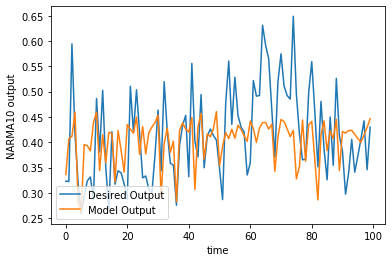

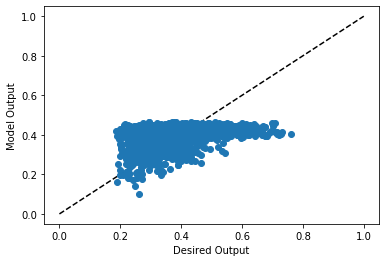

NRMSE is 0.9088761179771434
NMSE is 0.8260557978292022
MNRMSE is  0.24514110860102148


In [263]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.2,'gamma':0.0,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**Feedback: Theta = 0.3, gamma = 0.2, Nvirt = 40, m0 = 1, beta_prime = 3**

0.0 0.005906941513020664
0.0033992157820051604 0.007046352481218531
0.004661485743271308 0.007100359835427286
0.0063924889528206704 0.007146563669938109
0.008766285528368277 0.007185993816264991
0.012021571336618452 0.0072203988247493515
0.01648567993065431 0.00725209026218163
0.02260749740328263 0.007283952324876377
0.031002599892108035 0.007319578039502604
0.04251515251442982 0.007363391213547759
0.058302793946818365 0.007420501252446729
0.07995304217364506 0.007496007438768887
0.10964292652341254 0.007593663788851405
0.15035789770837651 0.007714275930409897
0.20619202825140884 0.007854669517272974
0.28275968979620314 0.008008054101335624
0.3877601032963248 0.008165898152734144
0.5317515301305706 0.008320529633250789
0.729212952525235 0.008467359089752127
1.0 0.008606070435965446
Optimal lambda =  0.0 with MSE =  0.005906941513020664


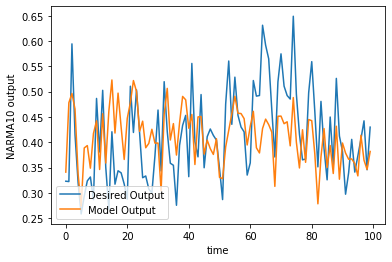

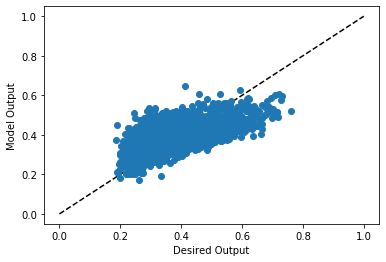

NRMSE is 0.7506273223132409
NMSE is 0.563441377003146
MNRMSE is  0.20245841022605862


In [264]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**More virtual nodes!: Theta = 0.3, gamma = 0.2, Nvirt = 100, m0 = 1, beta_prime = 3**

0.0 0.006039548253779101
0.0033992157820051604 0.0066199306874680135
0.004661485743271308 0.006666609596968815
0.0063924889528206704 0.006714468149237303
0.008766285528368277 0.006762415075888435
0.012021571336618452 0.006810358219047487
0.01648567993065431 0.006859274132393265
0.02260749740328263 0.0069109908074749945
0.031002599892108035 0.006967831872520486
0.04251515251442982 0.007032224489719321
0.058302793946818365 0.007106274838532356
0.07995304217364506 0.007191275920775405
0.10964292652341254 0.0072872098147510195
0.15035789770837651 0.007392479510125256
0.20619202825140884 0.007504143082368033
0.28275968979620314 0.0076186868248461674
0.3877601032963248 0.00773302718911818
0.5317515301305706 0.007845300272590928
0.729212952525235 0.007955175866391983
1.0 0.008063694612840688
Optimal lambda =  0.0 with MSE =  0.006039548253779101


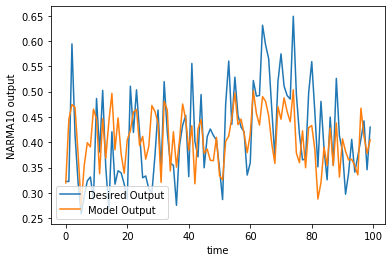

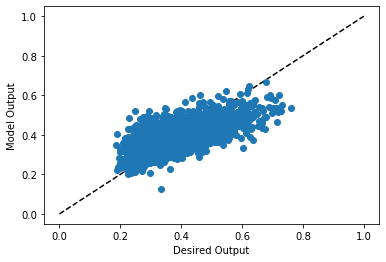

NRMSE is 0.7372889921623564
NMSE is 0.5435950579637832
MNRMSE is  0.19886080987613228


In [265]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 100, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**As many nodes as Appeltant!: Theta = 0.3, gamma = 0.2, Nvirt = 400, m0 = 1, beta_prime = 3**

0.0 0.0038421634236110542
0.0033992157820051604 0.004888315740816651
0.004661485743271308 0.004931655550393319
0.0063924889528206704 0.00497440870365784
0.008766285528368277 0.005017165221349567
0.012021571336618452 0.005060677008527622
0.01648567993065431 0.005105678389905455
0.02260749740328263 0.005152717414082911
0.031002599892108035 0.005202019267969467
0.04251515251442982 0.005253410270786897
0.058302793946818365 0.005306340548380092
0.07995304217364506 0.005360021141782602
0.10964292652341254 0.005413640662294236
0.15035789770837651 0.0054665943174874694
0.20619202825140884 0.005518666242894618
0.28275968979620314 0.0055701310660613785
0.3877601032963248 0.005621768853770963
0.5317515301305706 0.005674829826519614
0.729212952525235 0.005731023672478261
1.0 0.005792584256742243
Optimal lambda =  0.0 with MSE =  0.0038421634236110542


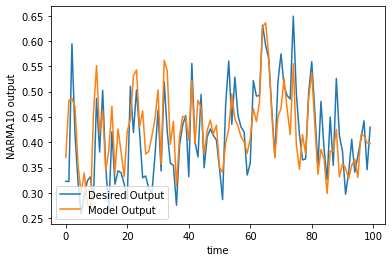

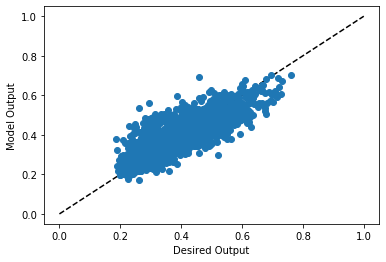

NRMSE is 0.5893943409209842
NMSE is 0.3473856891096812
MNRMSE is  0.1589708204217244


In [266]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 400, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.3,'gamma':0.2,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

*Almost the Appeltant value!!*

**Same idea, but no feedback (with tweaks): Theta = 0.7, gamma = 0.0, Nvirt = 400, m0 = 1, beta_prime = 3**

0.0 0.008928587287587322
0.0033992157820051604 0.009264826102408679
0.004661485743271308 0.00927958021237357
0.0063924889528206704 0.00929511063959729
0.008766285528368277 0.009311291590171656
0.012021571336618452 0.009327908823361583
0.01648567993065431 0.009344771620031953
0.02260749740328263 0.009361794454372244
0.031002599892108035 0.009379022926729996
0.04251515251442982 0.009396658751134913
0.058302793946818365 0.00941514009601773
0.07995304217364506 0.009435247377921037
0.10964292652341254 0.00945812989062018
0.15035789770837651 0.009485174786312478
0.20619202825140884 0.009517750902653497
0.28275968979620314 0.009556947288699307
0.3877601032963248 0.009603392173018534
0.5317515301305706 0.009657115996393937
0.729212952525235 0.00971737733426831
1.0 0.009782499250415978
Optimal lambda =  0.0 with MSE =  0.008928587287587322


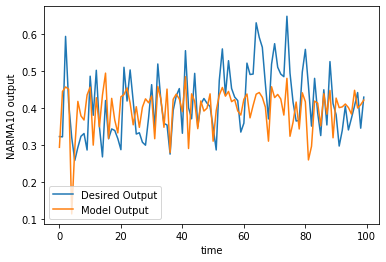

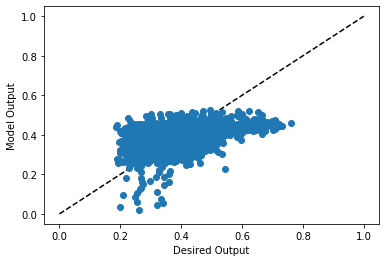

NRMSE is 0.8948423541433892
NMSE is 0.8007428387688825
MNRMSE is  0.24135593661112664


In [268]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 100, 1, m0=1, mask_sparse=0.5, bias=False)
params = {'theta':0.7,'gamma':0.0,'beta_prime':3}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

Not bad, but not amazing.

**Comparison to a shift register - not sure this is the correct definition of a shift register, but it is informative!!!**

In [272]:
def shift_func(j, s_old, gamma):
    return j + s_old*gamma

In [273]:
class shift_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        #Getting parameters
        # gamma = feedback term
        gamma = params['gamma']

        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            
            #First column is fed into from last column of previous row
            S[k,0] = shift_func(J[k,0],S[k-1,0], gamma)
            
            for i in range(1,self.Nvirt):
                #Moving along one row feeding in the values from the last column
                S[k,i] = shift_func(J[k,i],S[k-1,i],gamma)
                
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
        

**Just a shift register - no feedback**

0.0 0.046116060069596836
0.0033992157820051604 0.04612323399630094
0.004661485743271308 0.04612323125272618
0.0063924889528206704 0.0461232274905407
0.008766285528368277 0.04612322233167161
0.012021571336618452 0.04612321525784318
0.01648567993065431 0.04612320555863373
0.02260749740328263 0.04612319226026003
0.031002599892108035 0.04612317402858362
0.04251515251442982 0.046123149035942515
0.058302793946818365 0.04612311477984954
0.07995304217364506 0.0461230678356743
0.10964292652341254 0.04612300352053041
0.15035789770837651 0.04612291543787879
0.20619202825140884 0.04612279486340273
0.28275968979620314 0.04612262992249227
0.3877601032963248 0.04612240449899585
0.5317515301305706 0.04612209680791534
0.729212952525235 0.046121677567844875
1.0 0.046121107738300894
Optimal lambda =  0.0 with MSE =  0.046116060069596836


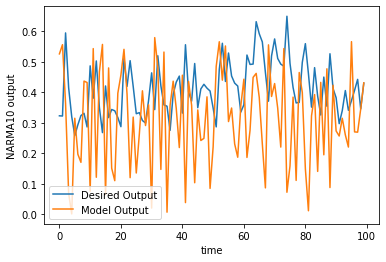

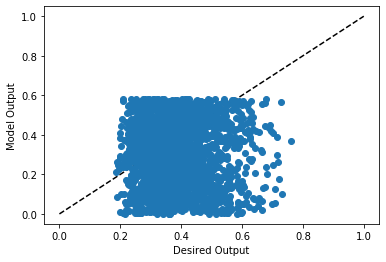

NRMSE is 2.0956996895048756
NMSE is 4.391957188590831
MNRMSE is  0.5652499114218791


In [276]:
net = shift_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'gamma':0.0}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**Add feedback to shift register (gamma : 0.5)**

0.0 0.017831720203766405
0.0033992157820051604 0.017777478327744296
0.004661485743271308 0.017777477084523687
0.0063924889528206704 0.0177774753791766
0.008766285528368277 0.01777747304100237
0.012021571336618452 0.017777469834305983
0.01648567993065431 0.017777465437166056
0.02260749740328263 0.017777459407426536
0.031002599892108035 0.01777745113918721
0.04251515251442982 0.01777743980157283
0.058302793946818365 0.01777742425600468
0.07995304217364506 0.017777402941365872
0.10964292652341254 0.01777737371883203
0.15035789770837651 0.01777733365800658
0.20619202825140884 0.017777278745926224
0.28275968979620314 0.01777720348969502
0.3877601032963248 0.01777710037603062
0.5317515301305706 0.017776959138081392
0.729212952525235 0.017776765764927694
1.0 0.017776501171508814
Optimal lambda =  1.0 with MSE =  0.017776501171508814


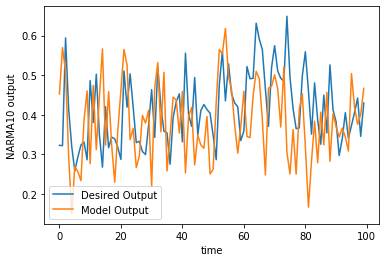

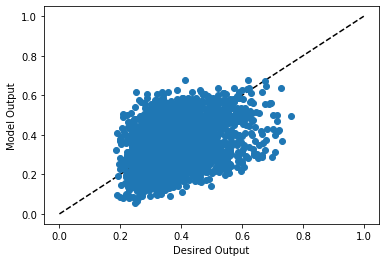

NRMSE is 1.282988748971488
NMSE is 1.6460601299874236
MNRMSE is  0.3460463731245468


In [278]:
net = shift_SNR(1, 400, 1, m0=0.1, mask_sparse=0.5, bias=False)

params = {'gamma':0.5}
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

Suprisingly good, although not as good as with the reservoir.

## Examining characteristic timescales

We rewrote $w t' = w' [w_0 t'] $ where: $w' = w/w_0 = \cosh{(2 \beta' H')} \exp{(-\beta' H'^2)}$, and $w_0 = 2 \exp{(-\beta')}$

In [64]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants

#3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

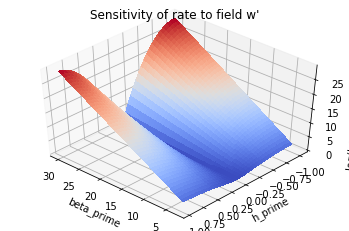

In [166]:
# Remove previously open figure
if 'w_prime_fig' in locals():
    plt.close(w_prime_fig)

def SPNC_total_rate_sw(beta_prime,h_prime):
    
    w = SPNC_rate_sw(beta_prime,h_prime,+1) + SPNC_rate_sw(beta_prime,h_prime,-1)
    return w
    
# Function that defines w_prime
def SPNC_w_prime_sw(beta_prime,h_prime):
    w_prime = SPNC_total_rate_sw(beta_prime,h_prime)/SPNC_total_rate_sw(beta_prime,0)
            
    return w_prime

# Set up plot
w_prime_fig = plt.figure()
ax = w_prime_fig.gca(projection='3d')
beta_prime = np.arange(3,30,0.1)
h_prime = np.arange(-1,1,0.05)
beta_prime, h_prime = np.meshgrid(beta_prime, h_prime)
ax.set_title("Sensitivity of rate to field w'")
ax.set_xlabel("beta_prime")
ax.set_ylabel('h_prime')
ax.set_zlabel('log(base rate multiplier)')
ax.view_init(azim=133, elev=45)
# Plot
surf = ax.plot_surface(beta_prime,h_prime,np.log(SPNC_w_prime_sw(beta_prime,h_prime)), 
                       cmap = cm.coolwarm, linewidth = 0, antialiased=False)
plt.show()

There is a dramatic increase in the sensitivity to field with increasing $\beta'$. <br>

It is interesting to consider the absolute rate:

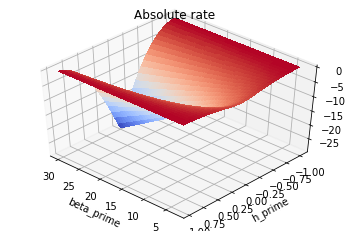

In [167]:
# Remove previously open figure
if 'w_prime_fig' in locals():
    plt.close(w_prime_fig)

def SPNC_total_rate_sw(beta_prime,h_prime):
    
    w = SPNC_rate_sw(beta_prime,h_prime,+1) + SPNC_rate_sw(beta_prime,h_prime,-1)
    return w
    

# Set up plot
w_prime_fig = plt.figure()
ax = w_prime_fig.gca(projection='3d')
beta_prime = np.arange(3,30,0.1)
h_prime = np.arange(-1,1,0.05)
beta_prime, h_prime = np.meshgrid(beta_prime, h_prime)
ax.set_title("Absolute rate")
ax.set_xlabel("beta_prime")
ax.set_ylabel('h_prime')
ax.set_zlabel('log(rate)')
ax.view_init(azim=133, elev=45)
# Plot
surf = ax.plot_surface(beta_prime,h_prime,np.log(SPNC_total_rate_sw(beta_prime,h_prime)), 
                       cmap = cm.coolwarm, linewidth = 0, antialiased=False)
plt.show()

From this we can see that whilst there is a dramatic drop in rate with increasing $\beta'$ at zero field, the rate for large field remains similar for all values. This makes sense as for large fields the energy barrier is always similar to the thermal energy. But for large $\beta'$ and low field the energy barrier becomes $\gg$ than the thermal energy.

This field sensitivity might be a big problem for going to large values of $\beta'$ in ML. However, we should be able to stick to $\beta' < 30$ for any pratical device. 

### ML at big beta

In [88]:
# Making sure net parameters are initilised

def Ridge_regression(S, Y, l):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \lambda |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * S = (S^T * Y  + \lambda I) * W
        W = (S^T*S + \lambda I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + l*np.eye(len(STS)))
    return np.matmul(Sdag, STY)

def MG_func(x, J, gamma, eta, p):
    return eta*(x + gamma*J) / (1 + np.power( x + gamma*J, p))

# Reduced magnetisation for two state system evolving with constant field 
# note: I am using the notation, w12: transition rate from state 1, to state 2
# w12, w21 must be constant over the tstep!
def SPNC_magnetisation_two_state(w21,w12,m0,tstep):

    wdiff = w21 - w12
    w = w12 + w21
    wratio = wdiff/w
    m = wratio + (m0 - wratio)*np.exp(-w*tstep)

    return m

# Stoner-wolfarth rate
    # plusminus = -1 gives rate 21, = +1 gives rate 12 
def SPNC_rate_sw(beta_prime,h_prime,minusplus):
    
    w = np.exp( -beta_prime * np.power( (1 + minusplus * h_prime) ,2) )
    
    return w

def SPNC_magnetisation_sw(beta_prime,h_prime,m0,t_prime_step):
    
    w21 = SPNC_rate_sw(beta_prime,h_prime,-1)
    w12 = SPNC_rate_sw(beta_prime,h_prime,+1)
    
    return SPNC_magnetisation_two_state(w21,w12,m0,t_prime_step)

def MSE (pred, desired):
    return np.mean(np.square(np.subtract(pred,desired)))

class SPNC_SNR:
    def __init__(self, Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None):
        '''
        Nin = input size
        Nvirt = number of virtual nodes
        Nout = output size
        m0 = magnitude of the mask values
        mask_sparse = sparsity factor for mask matrix
        bias = bool flag for using bias
        act = pass an activation function to use
        inv_act = function which applies the inverse of act
        '''
        self.Nin = Nin
        self.Nvirt = Nvirt
        self.Nout = Nout
        self.m0 = m0
        
        # Mask is random matrix of -m0 and m0
        # mask_sparse defines the sparsity level of the input mask
        # i.e 1.0 = full, 0.0 = empty
        self.M = 2*self.m0*(np.random.randint(0,2, (Nvirt,Nin))-0.5)
        #self.M *= 1.0*(np.random.random(size=(Nvirt, Nin)) <= mask_sparse)
        # Empty weight matrix 
        self.W = np.zeros( (Nvirt + int(bias), Nout))
        
        self.use_bias=bias
        
        # Activation and inverse activation functions
        self.f_act = act
        self.f_inv_act = inv_act
        
    def transform(self, u, params):
        '''
        Function to generate the reservoir signal from an input u
        params = dict for various parameters
        '''
        Ns = len(u)
        
        # Unflattens input if it is 1d
        u = u.reshape((Ns, self.Nin))
        
        J = np.zeros((Ns, self.Nvirt))
        
        # expands the signal to include a bias column is req'd
        if self.use_bias:
            S = np.ones((Ns, self.Nvirt+1))
        else:
            S = np.zeros((Ns, self.Nvirt))
        
        #Getting parameters
        # theta = temporal node spacing
        theta = params['theta']
        
        # gamma = feedback term
        gamma = params['gamma']
        
        #beta_prime = KV/KbT (effective temperature)
        beta_prime = params['beta_prime']
        
        # parameters for the MG function
        #Sigma = np.exp(-theta)
        #gamma = 0.005
        #eta = 0.5
        #P = 1
        
        J = np.matmul(u, self.M.T)
        for k in range(Ns):              
            # S[k,0] = S[k-1, self.Nvirt-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,0], J[k,0], gamma, eta, P)
            
            #First column is fed into from last column of previous row
            S[k,0] = SPNC_magnetisation_sw(beta_prime, (J[k,0] + gamma*S[k-1,0]) ,S[k-1,self.Nvirt-1],theta)
            
            for i in range(1,self.Nvirt):
                # S[k,i] = S[k,i-1] * Sigma + (1.0 - Sigma)*MG_func( S[k-1,i], J[k,i], gamma, eta, P)   
                
                #Moving along one row feeding in the values from the last column
                S[k,i] = SPNC_magnetisation_sw(beta_prime, (J[k,i] + gamma*S[k-1,i]), S[k,i-1], theta)
        return S
    
    def forward(self, S):
        if self.f_act is not None:
            return self.f_act(np.matmul(S, self.W))
        else:
            return np.matmul(S, self.W)
    
    def train(self, u_train, d_train, u_valid, d_valid, params):
        
        S_train = self.transform(u_train, params)
        S_valid = self.transform(u_valid, params)
                
        if self.f_inv_act is not None:
            inv_act_d_train = self.f_inv_act(d_train)
            inv_act_d_valid = self.f_inv_act(d_valid)
        else:
            inv_act_d_train = d_train
            inv_act_d_valid = d_valid
        
        # regularisation parameters to validate over
        lambdas = np.exp(np.linspace(-6,0,num=20))
        lambdas[0] = 0.0
        
        errs = np.zeros(lambdas.shape)
        for i,l in enumerate(lambdas):
            self.W = Ridge_regression(S_train, inv_act_d_train, l)
            valid_pred = self.forward(S_valid)
            errs[i] = MSE(valid_pred, d_valid)
            print(l, MSE(valid_pred, d_valid))
    
        lopt = lambdas[np.argmin(errs)]
        print('Optimal lambda = ', lopt, 'with MSE = ', np.min(errs))
        self.W = Ridge_regression(S_train, d_train, lopt)
        
def NARMA10(N):
    u = np.random.random(N+50)*0.5
    y = np.zeros(N+50)
    for k in range(10,N+50):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return u[50:], y[50:]

Ntrain = 5000
Nvalid = 2000
Ntest = 2000

u, d = NARMA10(Ntrain + Nvalid + Ntest)

utrain = u[:Ntrain]
dtrain = d[:Ntrain]
uvalid = u[Ntrain:Ntrain+Nvalid]
dvalid = d[Ntrain:Ntrain+Nvalid]
utest = u[Ntrain+Nvalid:]
dtest = d[Ntrain+Nvalid:]

**Trying excessivley big beta: Theta = 0.005, gamma = 0.2, Nvirt = 40, m0 = 2, beta_prime = 300**

0.0 0.024755709638487104
0.0033992157820051604 0.02012399122951322
0.004661485743271308 0.020135515001831982
0.0063924889528206704 0.020151505249691715
0.008766285528368277 0.02017259189794686
0.012021571336618452 0.02019920021395057
0.01648567993065431 0.020231670683987135
0.02260749740328263 0.02027042306288074
0.031002599892108035 0.020315983225459532
0.04251515251442982 0.02036873573950476
0.058302793946818365 0.02042844228180409
0.07995304217364506 0.020493777287333887
0.10964292652341254 0.020562209934076158
0.15035789770837651 0.020630398046167436
0.20619202825140884 0.020694940482654488
0.28275968979620314 0.02075311956145555
0.3877601032963248 0.020803321383730533
0.5317515301305706 0.020845057612744553
0.729212952525235 0.02087871331269281
1.0 0.02090520272509592
Optimal lambda =  0.0033992157820051604 with MSE =  0.02012399122951322


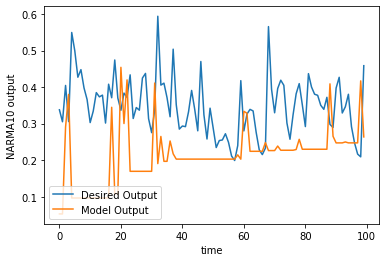

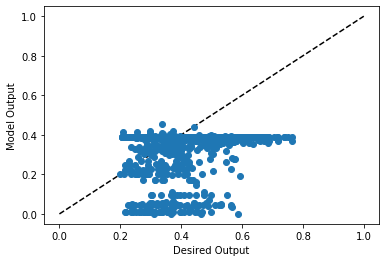

NRMSE is 1.2698810045906848
NMSE is 1.6125977658202464
MNRMSE is  0.34852880061066704


In [151]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=2, mask_sparse=0.5, bias=False)
params = {'theta':0.005,'gamma':0.2,'beta_prime':300}


# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

**Reducing the field range: Theta = very big, gamma = 0.2, Nvirt = 40, m0 = 0.1, beta_prime = 300**

theta is  2.913639592861884e+132 

0.0 2.3154471417321227
0.0033992157820051604 0.016567832956290104
0.004661485743271308 0.013525365391985272
0.0063924889528206704 0.012512929828830599
0.008766285528368277 0.012480859485377613
0.012021571336618452 0.01285864881925339
0.01648567993065431 0.01335565282153166
0.02260749740328263 0.013835897666252726
0.031002599892108035 0.014244274039863425
0.04251515251442982 0.014565138486149916
0.058302793946818365 0.014800092151101013
0.07995304217364506 0.014956581973817589
0.10964292652341254 0.015042386874987842
0.15035789770837651 0.015063227874057445
0.20619202825140884 0.015022061091831832
0.28275968979620314 0.014919397015371252
0.3877601032963248 0.014754447894291985
0.5317515301305706 0.014527128656025207
0.729212952525235 0.014240911403257199
1.0 0.013906177037725672
Optimal lambda =  0.008766285528368277 with MSE =  0.012480859485377613


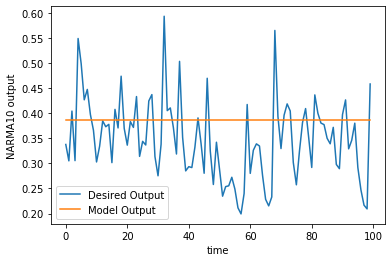

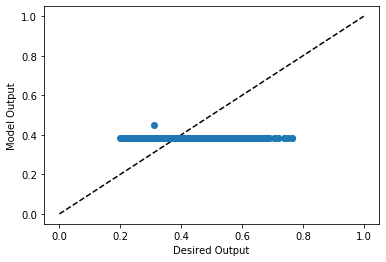

NRMSE is 1.0004027419618242
NMSE is 1.0008056461247363
MNRMSE is  0.27456837807882817


In [161]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=0.1, mask_sparse=0.5, bias=False)
beta_prime = 300
theta = beta_prime/(2*np.exp(-beta_prime))
print('theta is ', theta, '\n')
params = {'theta': 0.0000000005*theta,'gamma':0.2,'beta_prime':beta_prime}

# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

This is clearly very problematic. It looks like when $\beta'$ is big then it becomes very hard to distinguish between the changes. Let's look at the limits of our more realistic range:

**beta at limit of practical range: Theta = 0.5, gamma = 0.2, Nvirt = 40, m0 = 2, beta_prime = 30**

0.0 0.01812125177296979
0.0033992157820051604 0.017736607374124025
0.004661485743271308 0.017744044672701756
0.0063924889528206704 0.0177514745876399
0.008766285528368277 0.01775848049555978
0.012021571336618452 0.017764752474100077
0.01648567993065431 0.017770225989462738
0.02260749740328263 0.017775111535728
0.031002599892108035 0.01777980551569747
0.04251515251442982 0.017784736646242416
0.058302793946818365 0.017790234552637785
0.07995304217364506 0.01779648787120988
0.10964292652341254 0.01780359734303132
0.15035789770837651 0.017811666759697857
0.20619202825140884 0.017820859664395897
0.28275968979620314 0.017831391081668705
0.3877601032963248 0.017843475574673296
0.5317515301305706 0.017857264684455414
0.729212952525235 0.017872784010260243
1.0 0.017889874798235374
Optimal lambda =  0.0033992157820051604 with MSE =  0.017736607374124025


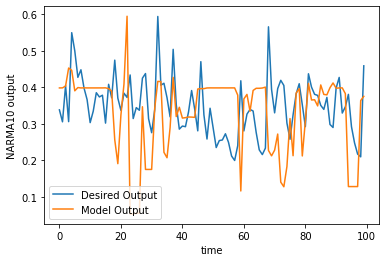

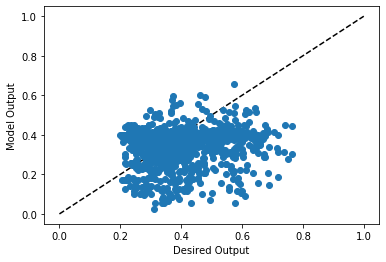

NRMSE is 1.2095949517365017
NMSE is 1.4631199472664294
MNRMSE is  0.3319828206181619


In [198]:
# Defining the net
# potential params : ( Nin, Nvirt, Nout, m0=0.1, mask_sparse=1.0, bias=False, act=None, inv_act=None)
net = SPNC_SNR(1, 40, 1, m0=2, mask_sparse=0.5, bias=False)
params = {'theta': 0.5,'gamma':0.2,'beta_prime':30}
# Running the net
net.train(utrain, dtrain, uvalid, dvalid, params)

Stest = net.transform(utest, params)
pred = net.forward(Stest)

plt.plot(dtest[100:200], label='Desired Output')
plt.plot(pred[100:200], label='Model Output')
plt.legend(loc='lower left')
plt.xlabel('time')
plt.ylabel('NARMA10 output')
plt.show()

plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(dtest[:], pred[:], 'o')
plt.xlabel('Desired Output')
plt.ylabel('Model Output')
plt.show()

#Errors
print('NRMSE is' ,np.sqrt(MSE(pred,dtest))/np.std(dtest))
print('NMSE is' , (MSE(pred,dtest))/np.power(np.std(dtest),2) )
print('MNRMSE is ',np.sqrt(MSE(pred,dtest))/np.mean(dtest))

This is somewhat better, although definitely worse than the low $\beta'$ case. It at least (just) out performs our shift register with feedback.
**One important factor might be scaling the narma input to be between -1 and 1 to make use of both sides of the resevoir or biasing it so we only need to deal with the oscilations, not the offset**